Python: 3.12.11 | OS: Windows 11
CWD: C:\Users\sinan\dsci510_fall2025_final_project\src
DATA: C:\Users\sinan\dsci510_fall2025_final_project\data
RESULTS: C:\Users\sinan\dsci510_fall2025_final_project\results
Kaggle creds status: env


**Running `data_collection.py`…**

API key loaded: True
Starting RAWG data collection (unfiltered)…

  1000 games collected so far
  2000 games collected so far
  3000 games collected so far
  4000 games collected so far
  5000 games collected so far
  6000 games collected so far
  7000 games collected so far
  8000 games collected so far
  8000 games collected so far
  9000 games collected so far
  10000 games collected so far

Collection complete.
Total collected: 10000
Saved dataset: C:\Users\sinan\dsci510_fall2025_final_project\data\rawg_10000_unfiltered.csv
Dataset URL: https://www.kaggle.com/datasets/nikdavis/steam-store-games
Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
steam.csv shape: (27075, 18)
vgsales.csv shape: (16598, 11)
steam columns (first 15): ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime']
vgsales columns: ['Ran

<Figure size 640x480 with 0 Axes>

✅ Finished `data_collection.py`

**Running `data_cleaning_preprocessing.py`…**

Loaded: {'rawg': (10000, 5), 'steam': (27075, 18), 'sales': (16598, 11)}
Post-canonicalization: {'rawg': (3479, 6), 'steam': (26822, 19), 'sales': (16598, 12)}
After Steam filters: (6097, 20)
Saved: rawg_clean.csv, steam_clean.csv, vgsales_clean.csv


✅ Finished `data_cleaning_preprocessing.py`

**Running `main.py`…**

RAWG dataset: (2621, 7)
Steam dataset: (6097, 20)
Sales dataset: (14353, 12)


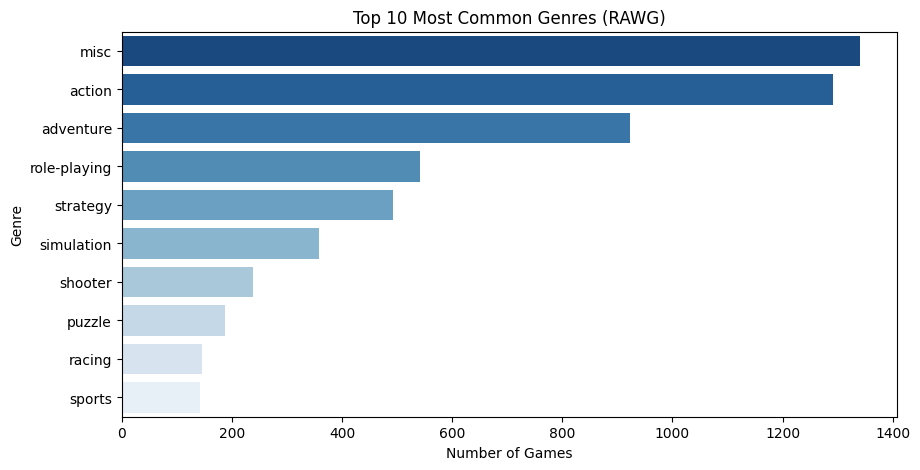

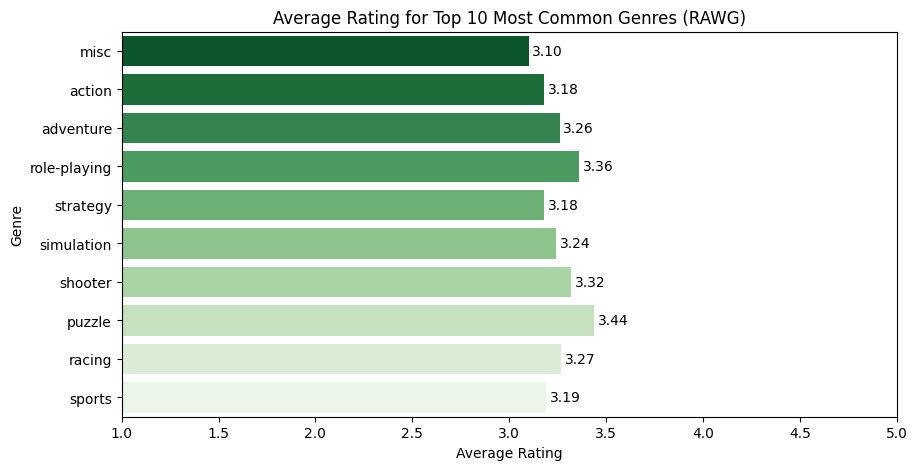

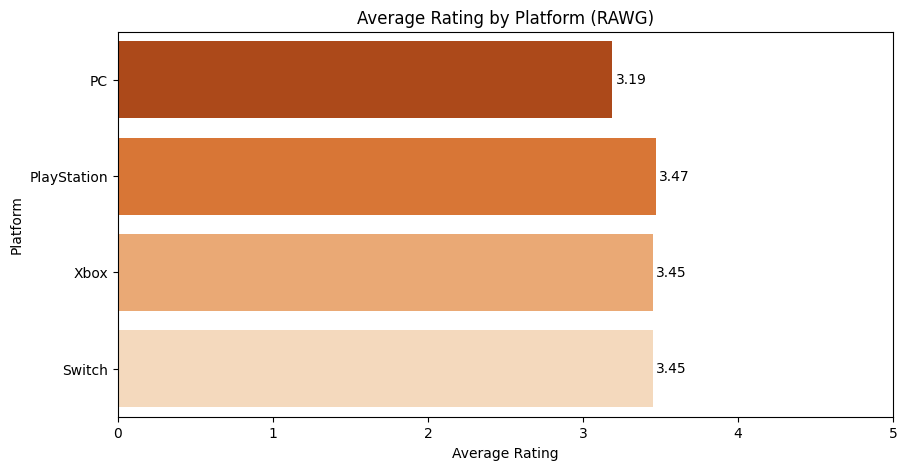

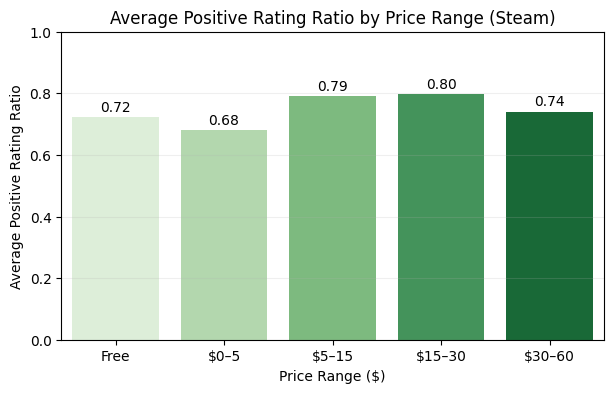

Correlation between price and average positive rating ratio: 0.188  (n=6,068)
Average positive rating ratio by review-volume bucket:
  review_bucket  pos_ratio  n_games
0          <100      0.627     1066
1       100–999      0.718     2685
2        1,000+      0.810     2346


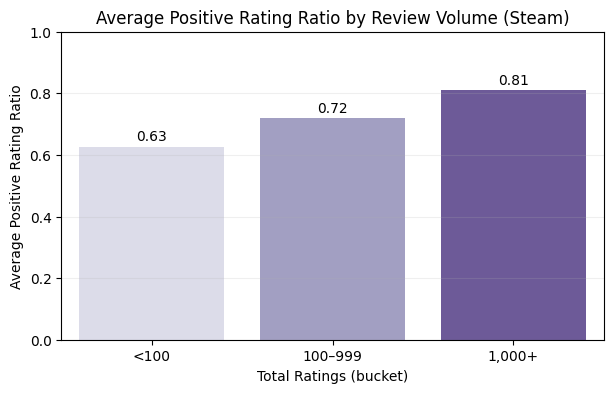

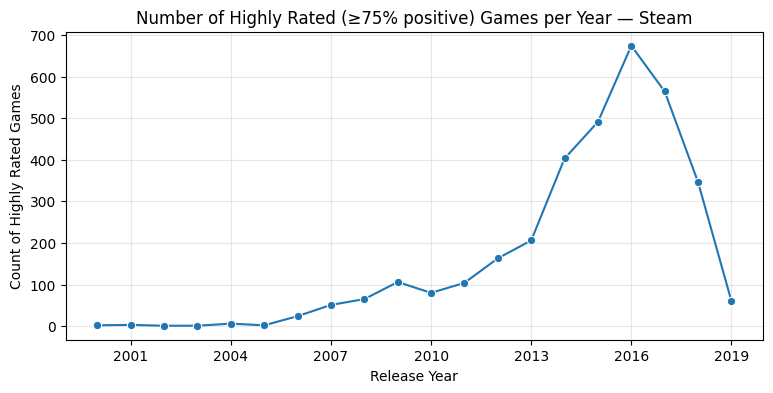

Top years by count of highly rated games:
 year  highly_rated_count
 2016                 674
 2017                 564
 2015                 491
 2014                 403
 2018                 346
 2013                 206
 2012                 163
 2009                 106
 2011                 104
 2010                  80


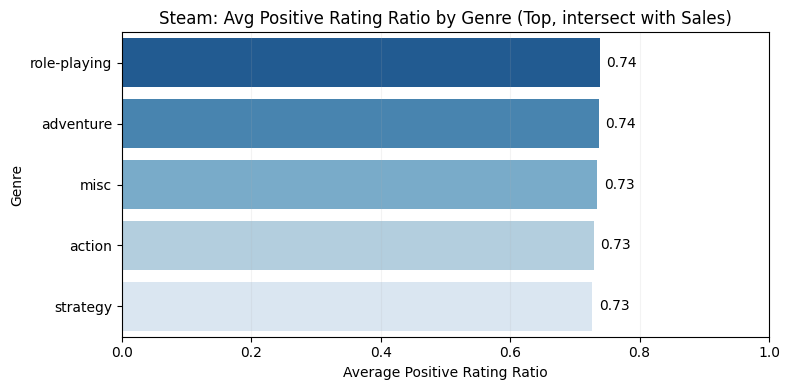

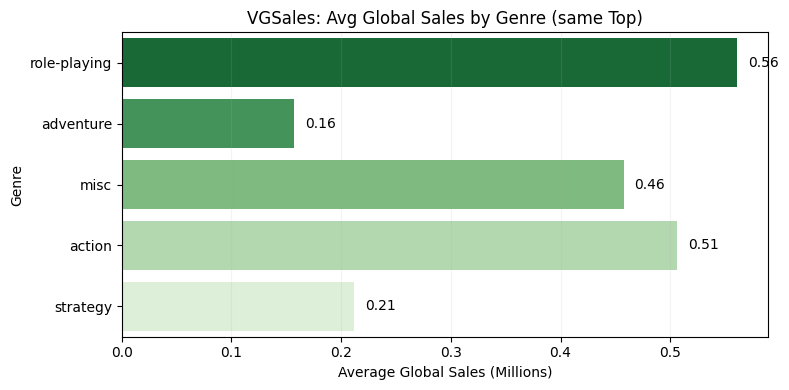

Correlation (genre avg Steam positive ratio vs. avg global sales): -0.387   (n=8)
R² Score: 0.082
RMSE: 0.167


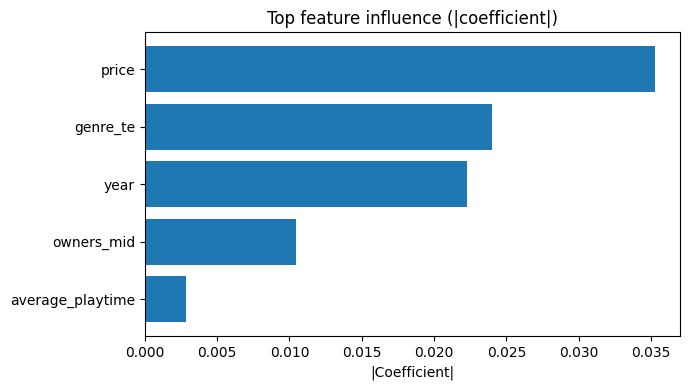

✅ Finished `main.py`

In [2]:
%matplotlib inline

import os, sys, platform
from pathlib import Path
from IPython.display import Markdown, display

if Path("data_collection.py").exists() and Path("main.py").exists():
    SRC = Path.cwd()
elif Path("src/data_collection.py").exists():
    %cd src
    SRC = Path.cwd()
else:
    raise SystemExit("Open this notebook from the project root or from src/.")

ROOT    = SRC.parent
DATA    = ROOT / "data"
RESULTS = ROOT / "results"
DATA.mkdir(parents=True, exist_ok=True)
RESULTS.mkdir(parents=True, exist_ok=True)

print("Python:", sys.version.split()[0], "| OS:", platform.system(), platform.release())
print("CWD:", SRC)
print("DATA:", DATA)
print("DOC:", DOC)
print("RESULTS:", RESULTS)

from dotenv import load_dotenv
load_dotenv(ROOT / ".env")                      
sys.path.append(str(SRC))                       
from config import ensure_kaggle_creds
status = ensure_kaggle_creds()                  
print("Kaggle creds status:", status)

def run(script: str):
    display(Markdown(f"**Running `{script}`…**"))
    %run -i {script}
    display(Markdown(f"✅Finished `{script}`"))

# 1) Collect raw data (RAWG + Kaggle (Steam +VGSales). 
run("data_collection.py")

# 2) Clean / standardize 
run("data_cleaning_preprocessing.py")

# 3) Analysis + charts 
run("main.py")